In [2]:
import cv2 as cv
import imutils
import sys
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#read the image from the specified directory
img = cv.imread(cv.samples.findFile("mri.jpg"))

#check if the image has been loaded correctly
if img is None:
    sys.exit("Impossibile leggere l'immagine.")

# Salva l'immagine in formato PNG
cv.imwrite('mri.png', img)

True

HEIGHT: 568
WIDTH: 1009
CHANNELS: 3


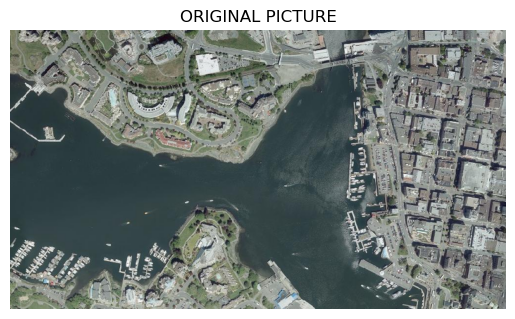

In [64]:
img = cv.imread(cv.samples.findFile("satellite.png"))
#get information concerning image dimensions
height, width, n_ch = img.shape
print(f'HEIGHT: {height}\nWIDTH: {width}\nCHANNELS: {n_ch}')

#display image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('ORIGINAL PICTURE')
plt.axis('off')
plt.show()

### Function Definition

In [2]:
def contrast_enh(img, p):
    chans = cv.split(img)
    for channel in chans:
        hist = cv.calcHist([channel], [0], None, [256], [0, 256])
        threshold = max(hist)*p
        
        
        for first in range(hist.size):
            if hist[first] > threshold:
                break;

        for last in range(255,-1,-1):
            if hist[last] > threshold:
                break;

        if last == first:
            den = 0.1
        else:
            den = last - first
            
        scale = 255 / den
        offset = first

        channel[channel < first] = 0
        channel[channel > last] = 255
        channel[(channel >= first) & (channel <= last)] = channel[(channel >= first) & (channel <= last)] * scale - offset
        
        final_image = cv.merge([chans[0], chans[1], chans[2]])
    
    return final_image

In [3]:
def image_sharp(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    # Apply the filter matrix to the image
    sharpened = cv.filter2D(image, -1, kernel)
    
    return sharpened

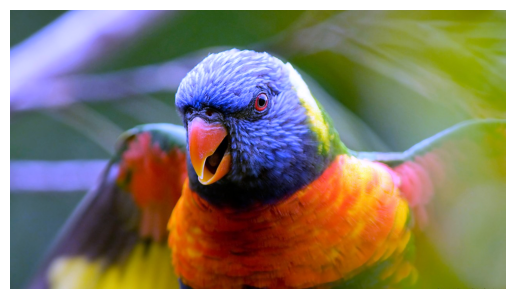

In [73]:
img = cv.imread(cv.samples.findFile("parrot.png"))

img_1 = contrast_enh(img, 0.02)
plt.imshow(cv.cvtColor(img_1, cv.COLOR_BGR2RGB))
#plt.title('ORIGINAL PICTURE')
plt.axis('off')
combined_fig_path = 'parrot_ce.png'
plt.savefig(combined_fig_path, bbox_inches='tight', pad_inches=0)
plt.show()

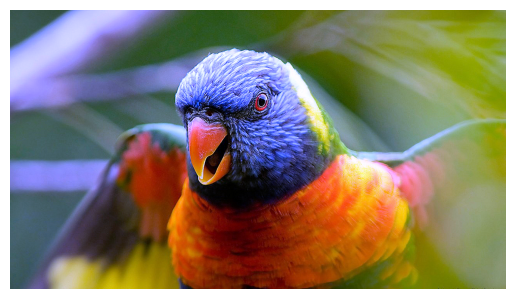

In [74]:
img_2 = image_sharp(img_1)
plt.imshow(cv.cvtColor(img_2, cv.COLOR_BGR2RGB))
#plt.title('ORIGINAL PICTURE')
plt.axis('off')
combined_fig_path = 'parrot_ce_sh.png'
plt.savefig(combined_fig_path, bbox_inches='tight', pad_inches=0)
plt.show()

(-0.5, 224.5, 224.5, -0.5)

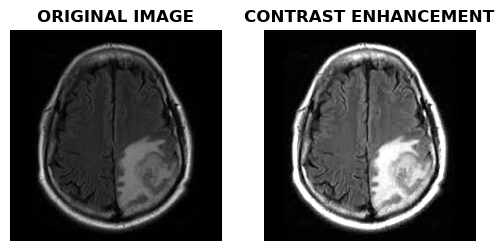

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax = axes[0]
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax.set_title(f'ORIGINAL IMAGE', fontweight = 'bold')
ax.axis('off')
ax = axes[1]
ax.imshow(cv.cvtColor(img_1, cv.COLOR_BGR2RGB))
ax.set_title(f'CONTRAST ENHANCEMENT', fontweight = 'bold')
ax.axis('off')

(-0.5, 224.5, 224.5, -0.5)

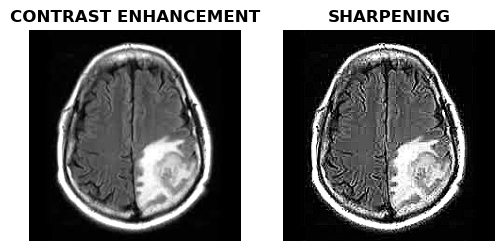

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax = axes[0]
ax.imshow(cv.cvtColor(img_1, cv.COLOR_BGR2RGB))
ax.set_title(f'CONTRAST ENHANCEMENT', fontweight = 'bold')
ax.axis('off')
ax = axes[1]
ax.imshow(cv.cvtColor(img_2, cv.COLOR_BGR2RGB))
ax.set_title(f'SHARPENING', fontweight = 'bold')
ax.axis('off')

(-0.5, 748.5, 565.5, -0.5)

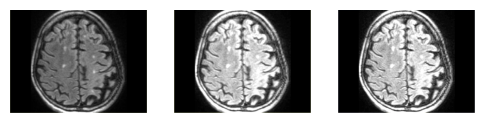

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 3))
ax = axes[0]
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
#ax.set_title(f'ORIGINAL IMAGE', fontweight = 'bold')
ax.axis('off')
ax = axes[1]
ax.imshow(cv.cvtColor(img_1, cv.COLOR_BGR2RGB))
#ax.set_title(f'CONTRAST ENHANCEMENT', fontweight = 'bold')
ax.axis('off')
ax = axes[2]
ax.imshow(cv.cvtColor(img_2, cv.COLOR_BGR2RGB))
#ax.set_title(f'SHARPENING', fontweight = 'bold')
ax.axis('off')
#combined_fig_path = 'pipeline_satellite.png'
#plt.savefig(combined_fig_path, bbox_inches='tight', pad_inches=0)

HEIGHT: 720
WIDTH: 1280
CHANNELS: 3


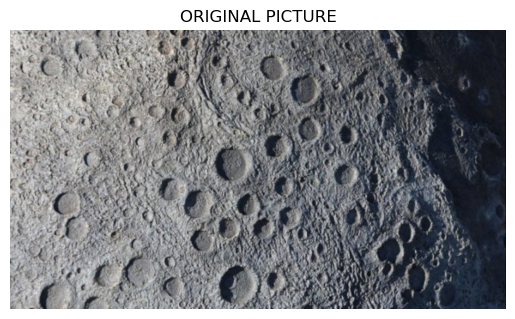

In [31]:
img = cv.imread(cv.samples.findFile("MOON.png"))
#get information concerning image dimensions
height, width, n_ch = img.shape
print(f'HEIGHT: {height}\nWIDTH: {width}\nCHANNELS: {n_ch}')

#display image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('ORIGINAL PICTURE')
plt.axis('off')
plt.show()

THRESHOLD: [1849.6]
195 27


<function matplotlib.pyplot.show(close=None, block=None)>

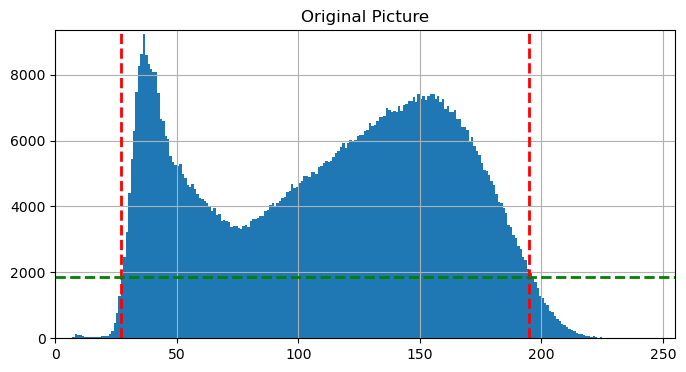

In [55]:
chans = cv.split(img)
ch = chans[0]
hist_1 = cv.calcHist([ch], [0], None, [256], [0, 256])

p = 0.2
threshold = max(hist_1)*p
print(f'THRESHOLD: {threshold}')
    
for first in range(hist.size):
    if hist_1[first] > threshold:
        break;


for last in range(255,-1,-1):
    if hist_1[last] > threshold:
        break;
        
print(last, first)
            
plt.figure(figsize=(8, 4))
plt.hist(ch.ravel(), bins=256, range=[0,256])
plt.axvline(x=first, color='r', linestyle='--', linewidth=2)
plt.axvline(x=last, color='r', linestyle='--', linewidth=2)
plt.axhline(y=threshold, color='g', linestyle='--', linewidth=2)
plt.xlim([0,255])
plt.ylim([-5, max(hist_1) + 100])
plt.grid(True)
plt.title('Original Picture')
combined_fig_path = 'histogram_original.png'
plt.savefig(combined_fig_path, bbox_inches='tight', pad_inches=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

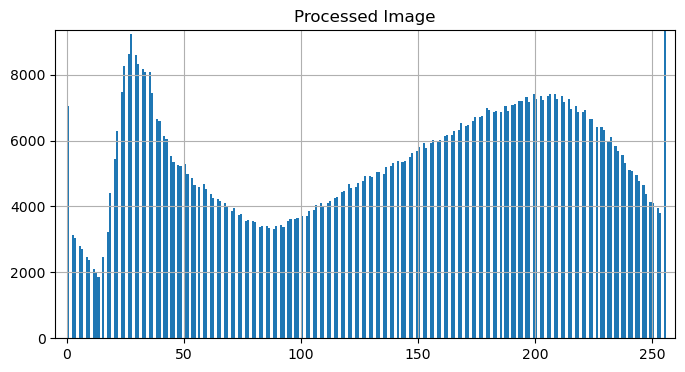

In [56]:
scale = 255 / (last - first)
ch[ch < first] = 0
ch[ch > last] = 255

#Anything else is scaled
ch[(ch >= first) & (ch <= last)] = ch[(ch >= first) & (ch <= last)] * scale - first

#revaluate the histogram
hist = cv.calcHist([ch], [0], None, [256], [0, 256])
plt.figure(figsize=(8, 4))
plt.hist(ch.ravel(), bins=256, range=[0,256])
plt.xlim([-5,260])
plt.ylim([-5, max(hist_1) + 100])
plt.grid(True)
plt.title('Processed Image')
combined_fig_path = 'histogram_processed.png'
plt.savefig(combined_fig_path, bbox_inches='tight', pad_inches=0)
plt.show


In [62]:
from PIL import Image

# Carica l'immagine
image = Image.open("python_logo.jpg")

# Converti l'immagine in formato RGBA (Red, Green, Blue, Alpha)
image = image.convert("RGBA")

# Estrai i canali RGBA
r, g, b, a = image.split()

# Crea una maschera per identificare i pixel trasparenti
mask = Image.eval(a, lambda a: 255 if a <= 128 else 0)

# Rimuovi lo sfondo trasparente
image = Image.composite(image, Image.new("RGBA", image.size, (255, 255, 255, 255)), mask)

# Salva l'immagine senza lo sfondo trasparente
image.save("python_logo.png")

UnidentifiedImageError: cannot identify image file 'python_logo.jpg'